### Try this notebook in Google Colab, Binder or SageMaker!


[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/InsightSoftwareConsortium/itkwidgets/blob/main/examples/integrations/itk/SelectROI.ipynb)
[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/InsightSoftwareConsortium/itkwidgets/HEAD?labpath=examples%2Fintegrations%2Fitk%2FSelectROI.ipynb)
[![Open In SageMaker Studio Lab](https://studiolab.sagemaker.aws/studiolab.svg)](https://studiolab.sagemaker.aws/import/github.com/InsightSoftwareConsortium/itkwidgets/blob/main/examples/integrations/itk/SelectROI.ipynb)

In [1]:
# Install dependencies for this example
import sys

!{sys.executable} -m pip install -q pooch tqdm "itk-io>=5.3.0" "itkwidgets[all]>=1.0a40"

In [2]:
import itk
import pooch
from ngff_zarr import to_multiscales, to_ngff_image, Methods
from itkwidgets import view

In [3]:
file_name = pooch.retrieve('https://data.kitware.com/api/v1/file/564a5b078d777f7522dbfaa6/download',
                           fname='005_32months_T2_RegT1_Reg2Atlas_ManualBrainMask_Stripped.nrrd',
                           known_hash='a4a5739d5484f48653404763f807ff2b0e1900209cce029d912c2f92797207b6',
                           progressbar=True)

In [4]:
image = itk.imread(file_name)
ngff_image = to_ngff_image(image)
multiscales = to_multiscales(ngff_image, method=Methods.DASK_IMAGE_GAUSSIAN)


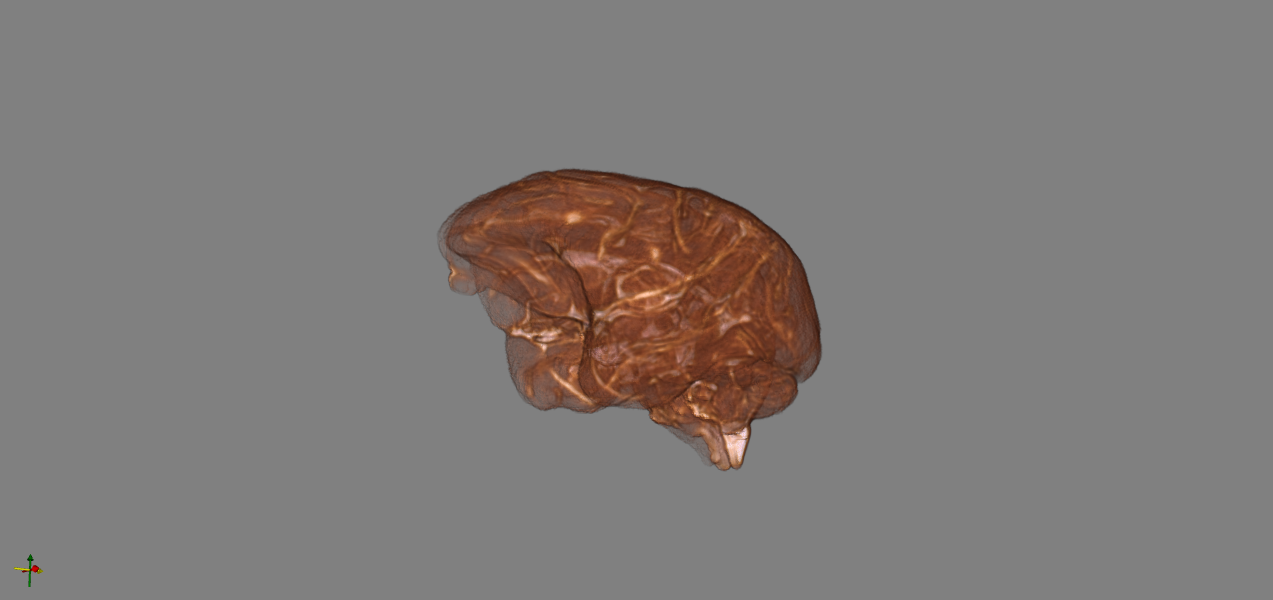
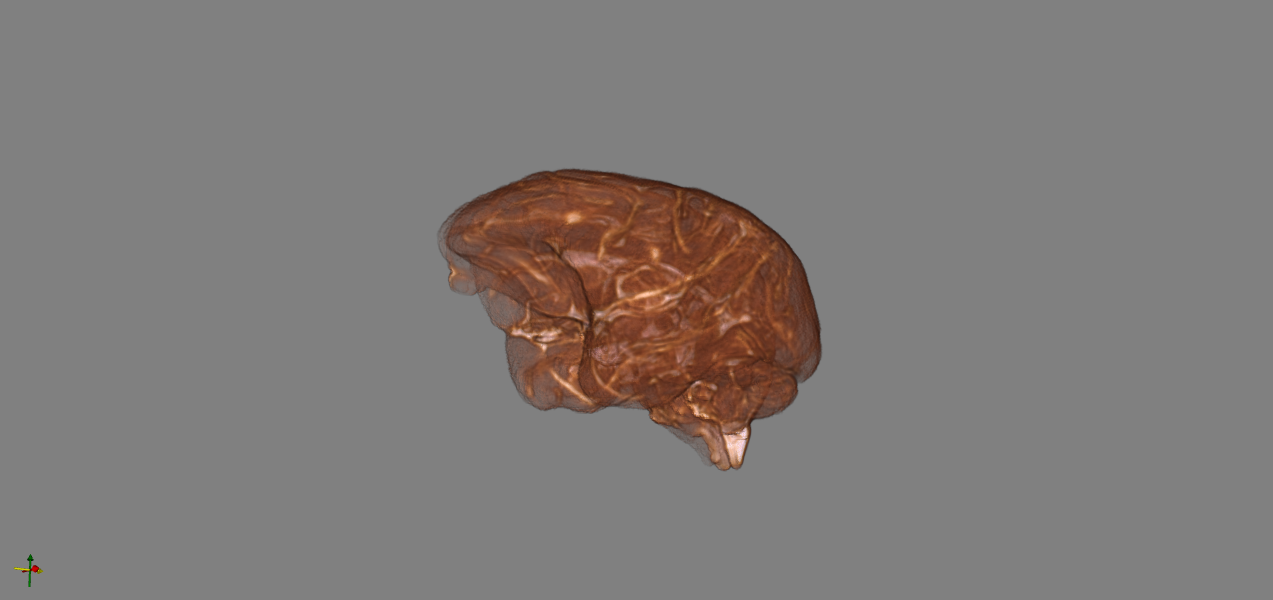

<IPython.core.display.Javascript object>

In [5]:
viewer = view(multiscales)

In [6]:
# Use the cropping planes to select the region of interest, then run the following cells

<img src="https://raw.githubusercontent.com/InsightSoftwareConsortium/itkwidgets/examples/integrations/itk/select_roi.gif" style="margin:auto"/>

In [7]:
# Find the scale that we currently have loaded
loaded_scale = viewer.get_current_scale()

In [8]:
loaded_scale

0

In [9]:
# Get the selected region for the current level
roi_region = viewer.get_roi_region()

In [10]:
roi_region

[[-0.5, -0.5, 103.06309145477312], [249.5, 349.5, 146.56424773624178]]

In [11]:
# Request the slice information for the ROI
# By default the information for the current level is returned.
# Request the highest level explicitly in case that is not what is loaded.
roi_slice = viewer.get_roi_slice(0)

In [12]:
roi_slice

(slice(0, 249, None), slice(0, 349, None), slice(103, 147, None))

In [13]:
# Create a new viewer using only the data in the ROI determined above
roi = multiscales.images[0].data[roi_slice]


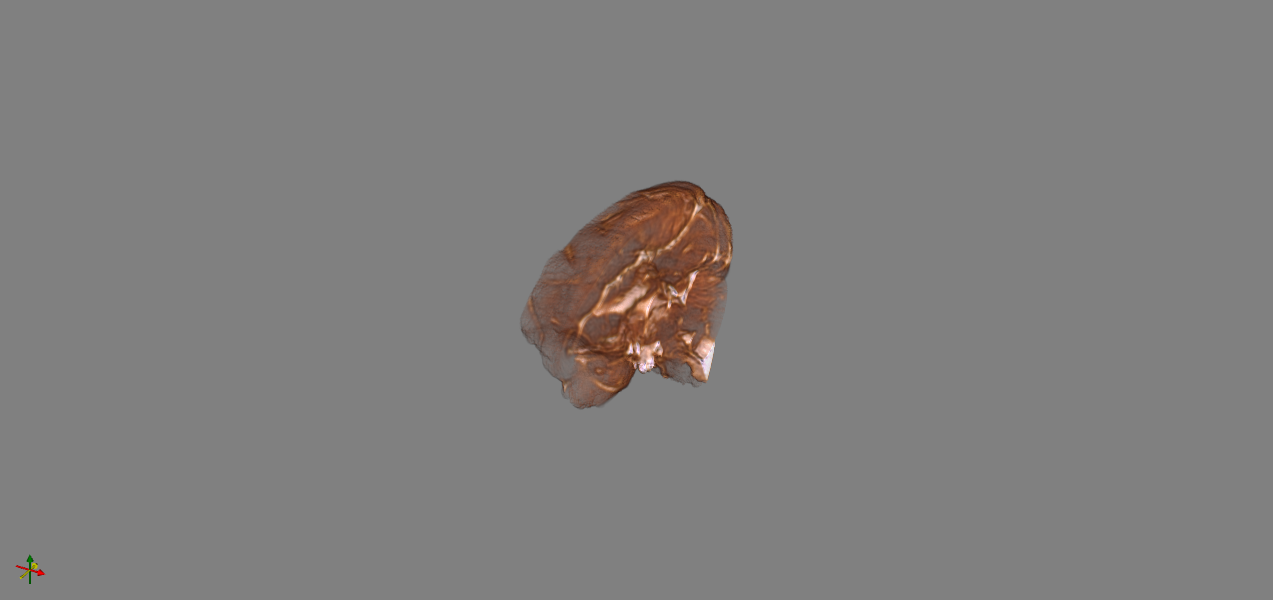
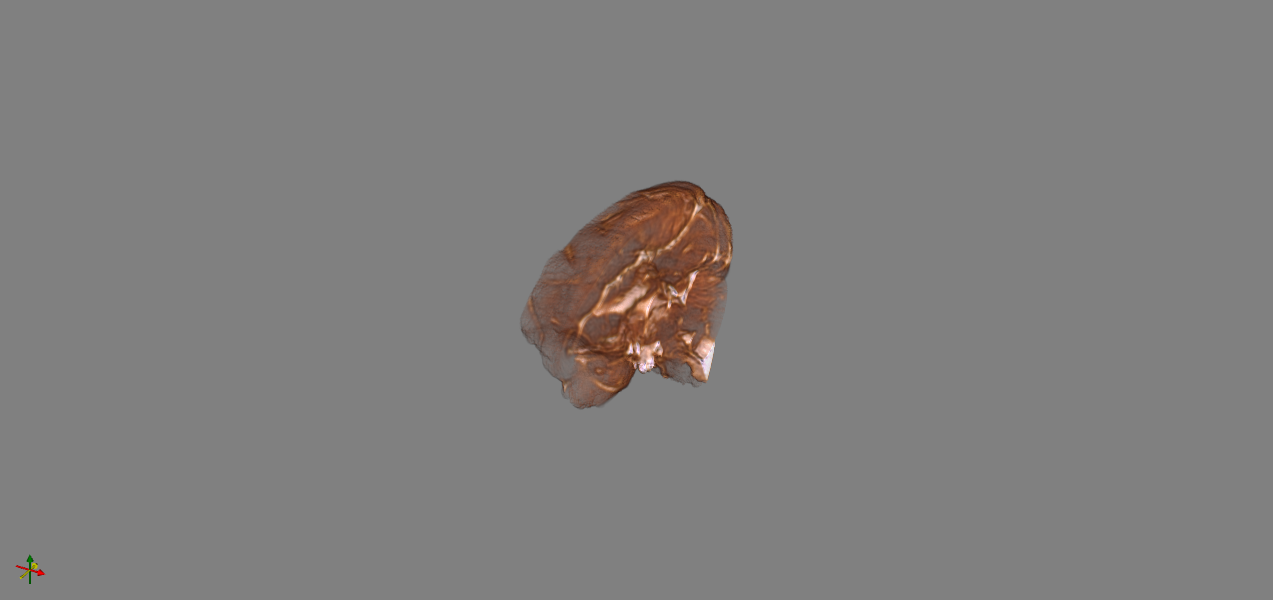

<IPython.core.display.Javascript object>

In [14]:
viewer2 = view(roi)